# Linear Classifier 

## Imports

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_predict


import ROCModule as roc 

num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 2304)
(12660,)
(4170, 2304)
(4170,)


## Preprocessing

In [5]:
# Combinging data with labels

y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)


In [6]:
# Randomises row order in a reproducable way 
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)

In [7]:
# Split data and lables that have undergone the same randomization process
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)

In [8]:
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255

In [9]:
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

##  Linear Classifier (Logistic Regression) 10 Fold Cross Validation

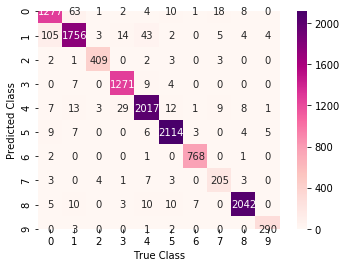

In [10]:
# Perfoming a 10 fold cross valudation using linear classifier 
lr10F = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')
y_pred = cross_val_predict(lr10F, x_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)

#confusion matrix
sns.heatmap(conf_mat.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=True)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [11]:
# Printing the Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      1410
         1.0       0.91      0.94      0.93      1860
         2.0       0.97      0.97      0.97       420
         3.0       0.98      0.96      0.97      1320
         4.0       0.96      0.96      0.96      2100
         5.0       0.98      0.98      0.98      2160
         6.0       0.99      0.98      0.99       780
         7.0       0.91      0.85      0.88       240
         8.0       0.98      0.99      0.98      2070
         9.0       0.98      0.97      0.97       300

    accuracy                           0.96     12660
   macro avg       0.96      0.95      0.96     12660
weighted avg       0.96      0.96      0.96     12660



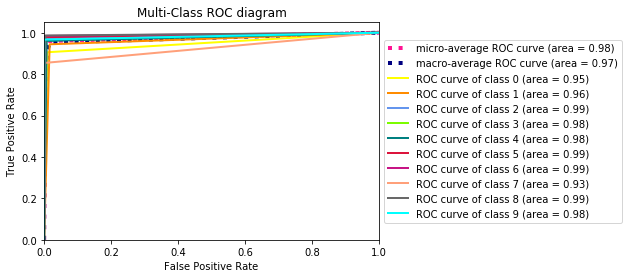

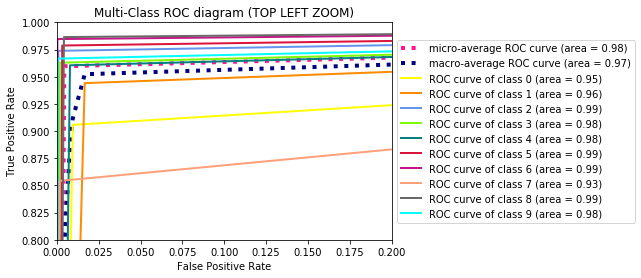

In [12]:
roc.plotROC(y_train, y_pred)

# Linear Classifier trained in train data, tested on test data

In [13]:
# Fiting data to our logistic regression model
lr = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(x_train, y_train)

In [14]:
# Testing out model on the test set
lc = lr.predict(x_test)

In [15]:
# Using boolean mask for compare true values vs predeicted values 
from scipy.stats import mode
labels = np.zeros_like(lc)
for j in range(10):
    mask = (lc == j)
    labels[mask] = mode(y_test[mask])[0]     

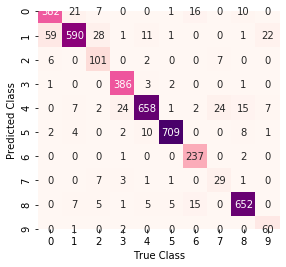

In [16]:
#Display heat map showing predicted class vs the actual lable
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [17]:
# Returning accuarcy scoreImports
accuracy_score(y_test, labels)

0.9122302158273381

In [18]:
# Printing the Classification Report 
'aqua'print(classification_report(y_test,labels))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       450
         1.0       0.83      0.94      0.88       630
         2.0       0.87      0.67      0.76       150
         3.0       0.98      0.92      0.95       420
         4.0       0.89      0.95      0.92       690
         5.0       0.96      0.98      0.97       720
         6.0       0.99      0.88      0.93       270
         7.0       0.69      0.48      0.57        60
         8.0       0.94      0.94      0.94       690
         9.0       0.95      0.67      0.78        90

    accuracy                           0.91      4170
   macro avg       0.90      0.83      0.86      4170
weighted avg       0.91      0.91      0.91      4170



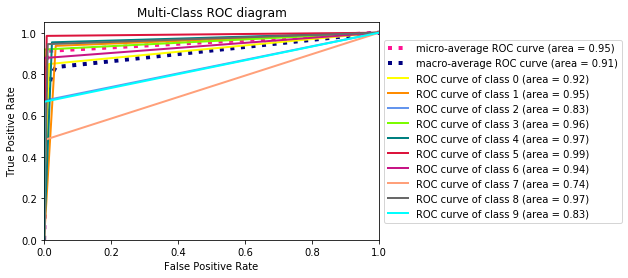

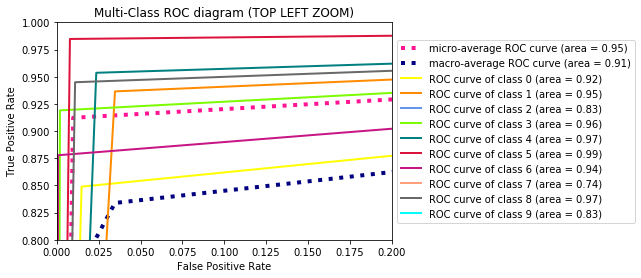

In [19]:
# Plotting ROC metric
roc.plotROC(y_test, labels)

# Moving 4000 images from training to test set

In [20]:
y_train = y_train.reshape(12660,1)
y_test = y_test.reshape(4170,1)

In [21]:
# Modifying datasets
x_train_new = x_train[0:8660,:]
y_train_new = y_train[0:8660,:]

x_temp = x_train[8660:12660,:]
y_temp = y_train[8660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))

y_train_new = y_train_new.reshape(8660)
y_test_new = y_test_new.reshape(8170)
'aqua'

In [22]:
# Fiting data to our logistic regression model
lr2 = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(x_train_new, y_train_new)

In [23]:
lc2 = lr2.predict(x_test_new)

In [24]:
lc2.shape

(8170,)

In [25]:
# Using boolean mask for compare true values vs predeicted values 
from scipy.stats import mode
labels = np.zeros_like(lc2)
for j in range(10):
    mask = (lc2 == j)
    labels[mask] = mode(y_test_new[mask])[0]    

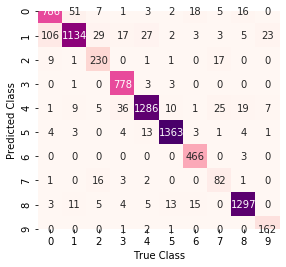

In [26]:
#Display heat map showing predicted class vs the actual lable
mat = confusion_matrix(y_test_new, labels)
sns.heatmap(mat.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [27]:
# Returning accuarcy score
accuracy_score(y_test_new, labels)

0.9282741738066096

In [28]:
# Printing the Classification Report 
print(classification_report(y_test_new,labels))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       910
         1.0       0.84      0.94      0.89      1210
         2.0       0.89      0.79      0.83       292
         3.0       0.99      0.92      0.96       844
         4.0       0.92      0.96      0.94      1342
         5.0       0.98      0.98      0.98      1395
         6.0       0.99      0.92      0.96       506
         7.0       0.78      0.62      0.69       133
         8.0       0.96      0.96      0.96      1345
         9.0       0.98      0.84      0.90       193

    accuracy                           0.93      8170
   macro avg       0.92      0.88      0.90      8170
weighted avg       0.93      0.93      0.93      8170



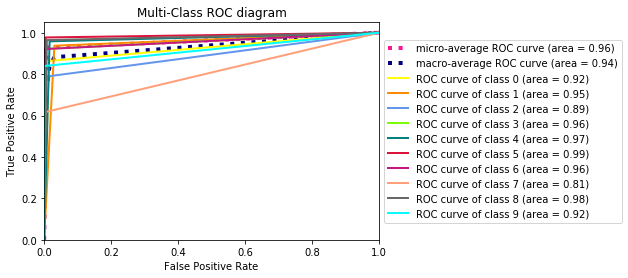

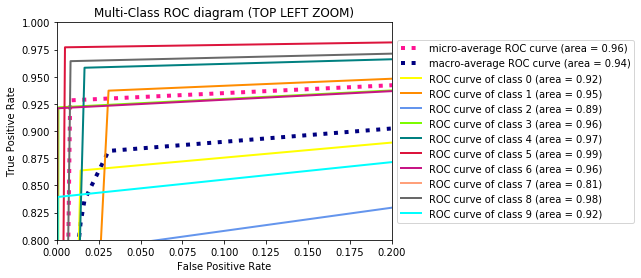

In [29]:
# Plotting ROC metric
roc.plotROC(y_test_new, labels)

# Moving 9000 images from training to test set


In [30]:
# Modifying datasets
x_train_new = x_train[0:6660,:]
y_train_new = y_train[0:6660,:]

x_temp = x_train[6660:12660,:]
y_temp = y_train[6660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))

y_train_new = y_train_new.reshape(6660)
y_test_new = y_test_new.reshape(10170)

In [31]:
# Fiting data to our logistic regression model
lr3 = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(x_train_new, y_train_new)

In [32]:
# Testing out model on the test set
lc3 = lr3.predict(x_test_new)

In [33]:
# Using boolean mask for compare true values vs predeicted values 
from scipy.stats import mode
labels = np.zeros_like(lc3)
for j in range(10):
    mask = (lc3 == j)
    labels[mask] = mode(y_test_new[mask])[0]  

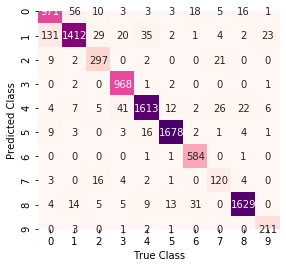

In [34]:
#Display heat map showing predicted class vs the actual lable
mat = confusion_matrix(y_test_new, labels)
sns.heatmap(mat.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [35]:
# Returning accuarcy score
accuracy_score(y_test_new, labels)

0.932448377581121

In [36]:
# Printing the Classification Report 
print(classification_report(y_test_new,labels))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      1131
         1.0       0.85      0.94      0.89      1499
         2.0       0.90      0.82      0.86       362
         3.0       0.99      0.93      0.96      1045
         4.0       0.93      0.96      0.94      1684
         5.0       0.98      0.98      0.98      1713
         6.0       0.99      0.92      0.95       638
         7.0       0.80      0.68      0.73       177
         8.0       0.95      0.97      0.96      1678
         9.0       0.97      0.87      0.92       243

    accuracy                           0.93     10170
   macro avg       0.93      0.89      0.91     10170
weighted avg       0.93      0.93      0.93     10170



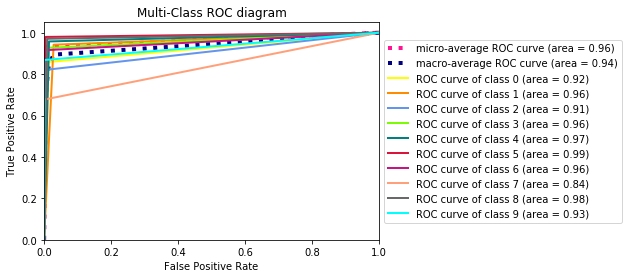

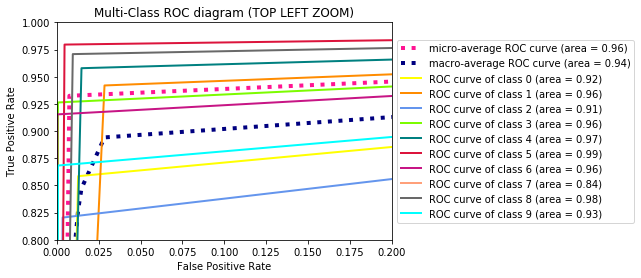

In [37]:
# Plotting ROC metric
roc.plotROC(y_test_new, labels)